In [16]:
%matplotlib notebook
import h5py
from h5py import *
from netCDF4 import *
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import scipy.signal

In [17]:
def convert_netcdf_to_hdf5(infiles_dir):
    
    
    dir_list = os.listdir(infiles_dir)
    dir_list = [f for f in dir_list if f.endswith(".nc") and f[0].isdigit()]
    #print dir_list

    DataTime = [] #Time 
    DataTBOT = [] # temperature
    DataRH = []  #Relative humidity
    DataWind = [] #Wind speed
    DataFSDS = [] #incoming solar rad
    DataFLDS = []# incoming longwave
    DataPRECT = [] # precipitation
    
    for file in dir_list:
        fname = os.path.join(infiles_dir, file)
        dataset = Dataset(fname)

        if dataset.file_format is not 'NETCDF3_CLASSIC':
            print('File format: ', dataset.file_format)
            sys.exit(0)
        #print dataset.variables.keys()
        for var in dataset.variables:
            #print var
            if var == "time":
                Time = dataset.variables[var][:].flatten()
                DataTime.append(Time)
            elif var == "TBOT":
                temp = dataset.variables[var][:].flatten()
                DataTBOT.append(temp)
                
            elif var == "RH":
                rh = dataset.variables[var][:].flatten()
                DataRH.append(rh)
            elif var == "WIND":
                wind = dataset.variables[var][:].flatten()
                DataWind.append(wind)
            elif var == "FSDS":
                incomingsw = dataset.variables[var][:].flatten()
                DataFSDS.append(incomingsw)
            elif var == "FLDS":
                incoming_lw = dataset.variables[var][:].flatten()
                DataFLDS.append(incoming_lw)
            elif var == "PRECTmms":
                precip = dataset.variables[var][:].flatten()
                DataPRECT.append(precip)


    DataTBOT = np.concatenate(DataTBOT) + 0.9*1 #add 0.9 K to get Anna's data ave. Temp
    DataRH = 0.01*np.concatenate(DataRH) + 0.06
    DataWind = np.concatenate(DataWind)
    DataFSDS = np.concatenate(DataFSDS)
    DataFLDS = np.concatenate(DataFLDS)
    DataPRECT = 0.001 *np.concatenate(DataPRECT)*2.2925#*1000*86400*365. #convert precipitation to [m/s]
    DataTime = np.arange(900,3600*.5*len(DataTBOT), 3600*.5)
    #DataTime = np.array([t/(86400*365) for t in DataTime])
    assert(len(DataTime) == len(DataTBOT))
    #print DataPRECT.reshape((-1,len(DataTBOT)/31)).sum(axis=1), len(DataTBOT)/31
    #Truncate Relative Humidity, [0.7,1]
    dat = dict(time=DataTime,
               T=DataTBOT,
               RH=DataRH,
               Wind=DataWind,
               QSW=DataFSDS,
               QLW=DataFLDS,
               P=DataPRECT)
    return dat

In [18]:
dat = convert_netcdf_to_hdf5("/Users/ajc/Desktop/ATS/spinup_data/barrow1985-2015/1x1pt_US-Brw_19852015")

In [19]:
print(dat)
dat_daily = dict()
dat_annual = dict()
dat1 = dict()
for k,d in dat.items():
    dat_daily[k] = d.reshape((-1, 48)).mean(axis=1)
    dat_annual[k] = dat_daily[k].reshape((-1, 365)).mean(axis=1)
#print(dat_annual['P']*1000*86400*365.) #annaual precip in mm/yr

{'time': array([  9.00000000e+02,   2.70000000e+03,   4.50000000e+03, ...,
         9.77611500e+08,   9.77613300e+08,   9.77615100e+08]), 'T': array([ 255.7 ,  255.95,  255.8 , ...,  253.45,  253.75,  254.05]), 'RH': array([ 0.811,  0.813,  0.814, ...,  0.74 ,  0.74 ,  0.74 ]), 'Wind': array([ 3.6 ,  3.6 ,  3.6 , ...,  3.  ,  3.15,  3.3 ]), 'QSW': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), 'QLW': array([ 165.259,  164.574,  166.859, ...,  155.151,  160.617,  166.084]), 'P': array([ 0.,  0.,  0., ...,  0.,  0.,  0.])}


In [20]:
#Truncate Relative Humidity data, [0.7,1.0]
for i in range(len(dat_daily['RH'][:])):
    d = dat_daily['RH'][i]
    if (d <0.7):
        dat_daily['RH'][i] = 0.7
    elif (d > 0.99):
        dat_daily['RH'][i] = 0.99

In [21]:
dat_iswr ={}
#plt.plot(dat['time'][48*30*365:], dat['QSW'][48*30*365:], 'k',label ='Half-hour',linewidth=0.5)
#plt.plot(dat_daily['time'], dat_daily['QSW'], 'b', label ='Daily',linewidth=0.5)
#plt.plot(dat_annual['time'], dat_annual['T'], 'r-x',label ='Annual',linewidth=2)
#plt.xlabel('Time [Yr]')
#plt.ylabel('Incoming solar radiation [W m^-2]')
#plt.xlim([0,31.5])
#plt.legend(loc='lower right')
#plt.savefig('plot11.png',bbox_inches="tight",dpi=250,figsize=(12,12))
#plt.show()
#plt.close()

In [22]:
poly_ = np.polyfit(dat_annual['time'], dat_annual['T'], 1)
poly = np.poly1d(poly_)
#plt.plot(dat_daily['time'], dat_daily['T'], 'r',label='Daily ave.')
#plt.plot(dat_annual['time'], dat_annual['T'], 'k-x',label='Annual ave.')
#plt.plot(dat_annual['time'], poly(dat_annual['time']), 'm-x',label='linear fit')
#plt.xlabel('Time [Yr]')
#plt.ylabel('Air Temperature [K]')
#plt.ylabel('Total Precipitation [mm]')
#plt.xlim([0,31.5])
#plt.legend(loc='lower right')
#plt.title('Trend in the annual average air temperatures')
#plt.savefig('temp-annual-avg.png',bbox_inches="tight",dpi=250,figsize=(12,12))
#plt.show()
#plt.close()

#print (dat_annual['T'])

T


<IPython.core.display.Javascript object>


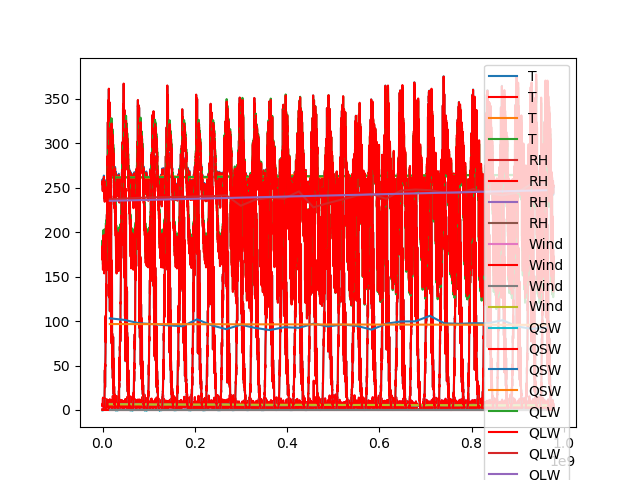

RH
Wind
QSW
QLW
P


In [23]:
#plt.plot(dat_daily['time'], dat_daily['T'], 'b')
#plt.plot(dat_daily['time'], dat_daily['T'] - poly(dat_daily['time']) + dat_daily['T'].mean(), 'c')
#plt.show()
#dat_daily_dtrend = dat_daily['T'] - poly(dat_daily['time']) + dat_daily['T'].mean()
dat_daily_dtrend = dict()

for k,d in dat_daily.items():
    if not k.startswith('time') :
        print (k)
        poly_ = np.polyfit(dat_annual['time'], dat_annual[k], 1)
        poly = np.poly1d(poly_)
        dat_daily_dtrend[k] = d - poly(dat_daily['time']) + d.mean()
        plt.plot(dat_daily['time'], dat_daily_dtrend[k], label = k)
        plt.plot(dat_daily['time'], dat_daily[k], 'r', label = k)
        plt.plot(dat_annual['time'], dat_annual[k], label = k)
        plt.plot(dat_annual['time'], poly(dat_annual['time']), label = k)
        plt.legend()
        plt.show()

In [25]:
outfile = h5py.File('/Users/ajc/Desktop/ATS/spinup_data/barrow1985-2015/barrow1985-2015-detrend.h5','w')

In [26]:
vars = dict(time = 'time [s]', T = 'air temperature [K]', RH = 'relative humidity [-]', 
            Wind = 'wind speed [m s^-1]', QSW = 'incoming shortwave radiation [W m^-2]', 
            QLW="incoming longwave radiation [W m^-2]", rain = 'precipitation rain [m s^-1]', 
            snow ='precipitation snow [m SWE s^-1]')

precip_rain = np.zeros(len(dat_daily['time']))
precip_snow = np.zeros(len(dat_daily['time']))

for d,c in zip(dat_daily_dtrend['T'],range(len(dat_daily['T']))):
    if d < 273.15:
        precip_snow[c] = dat_daily_dtrend['P'][c]
    else:
        precip_rain[c] = dat_daily_dtrend['P'][c] * 1.1/2.2925
    if c == 365:
        print (precip_snow[:365].mean(), precip_rain[:365].mean())
    

4.41015353091e-09 2.54737326967e-09


In [27]:
for k,d in dat_daily_dtrend.items():
    if k is not 'T'and k is not 'P':
        print (vars[k], k)
        outfile.create_dataset(vars[k], data=d)
outfile.create_dataset(vars['T'], data=dat_daily_dtrend['T'])
outfile.create_dataset(vars['rain'], data=precip_rain)
outfile.create_dataset(vars['snow'], data =precip_snow)
outfile.close()

relative humidity [-] RH
wind speed [m s^-1] Wind
incoming shortwave radiation [W m^-2] QSW
incoming longwave radiation [W m^-2] QLW


In [28]:
#Get scaled and trended DayMet
outfile1 = h5py.File('/Users/ajc/Desktop/ATS/spinup_data/barrow1985-2015/barrow1985-2015-trend.h5','w')

In [29]:
vars = dict(time = 'time [s]', T = 'air temperature [K]', RH = 'relative humidity [-]', 
            Wind = 'wind speed [m s^-1]', QSW = 'incoming shortwave radiation [W m^-2]', 
            QLW="incoming longwave radiation [W m^-2]", rain = 'precipitation rain [m s^-1]', 
            snow ='precipitation snow [m SWE s^-1]')

precip_rain = np.zeros(len(dat_daily['time']))
precip_snow = np.zeros(len(dat_daily['time']))

for d,c in zip(dat_daily['T'],range(len(dat_daily['T']))):
    if d < 273.15:
        precip_snow[c] = dat_daily['P'][c]
    else:
        precip_rain[c] = dat_daily['P'][c] * 1.1/2.2925
    if c == 365:
        print (precip_snow[:365].mean(), precip_rain[:365].mean())

3.22506754707e-09 1.88828282814e-09


In [30]:
for k,d in dat_daily.items():
    if k is not 'T'and k is not 'P':
        print (vars[k], k)
        outfile1.create_dataset(vars[k], data=d)
outfile1.create_dataset(vars['T'], data=dat_daily['T'])
outfile1.create_dataset(vars['rain'], data=precip_rain)
outfile1.create_dataset(vars['snow'], data =precip_snow)
outfile1.close()

time [s] time
relative humidity [-] RH
wind speed [m s^-1] Wind
incoming shortwave radiation [W m^-2] QSW
incoming longwave radiation [W m^-2] QLW
